# Assignment-17 SVM

# Salary Dataset

In [42]:
# Importig Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Loading data
train_data = pd.read_csv(r'C:\Users\Suraj\Dropbox\My PC (DESKTOP-LAM9SRV)\Downloads\SalaryData_Train(1).csv.crdownload')
test_data = pd.read_csv(r'C:\Users\Suraj\Dropbox\My PC (DESKTOP-LAM9SRV)\Downloads\SalaryData_Test(1).csv')

In [43]:
#EDA & Data Preprocessing
train_data.shape

(27342, 14)

In [44]:
test_data.shape

(15060, 14)

In [45]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [46]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [47]:
# Checking for null values
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [48]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [49]:
train_data.dtypes

age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native            object
Salary            object
dtype: object

In [50]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')
    

workclass
 Private             20187
 Self-emp-not-inc     2283
 Local-gov            1872
 State-gov            1149
 Self-emp-inc          983
 Federal-gov           855
 Without-pay            13
Name: workclass, dtype: int64


education
 HS-grad         8960
 Some-college    6049
 Bachelors       4585
 Masters         1460
 Assoc-voc       1170
 11th             952
 Assoc-acdm       897
 10th             742
 7th-8th          517
 Prof-school      483
 9th              413
 Doctorate        342
 12th             335
 5th-6th          267
 1st-4th          130
 Preschool         40
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       12712
 Never-married             8834
 Divorced                  3819
 Separated                  863
 Widowed                    759
 Married-spouse-absent      336
 Married-AF-spouse           19
Name: maritalstatus, dtype: int64


occupation
 Craft-repair         3665
 Prof-specialty       3638
 Exec-managerial      3603
 Adm-cler

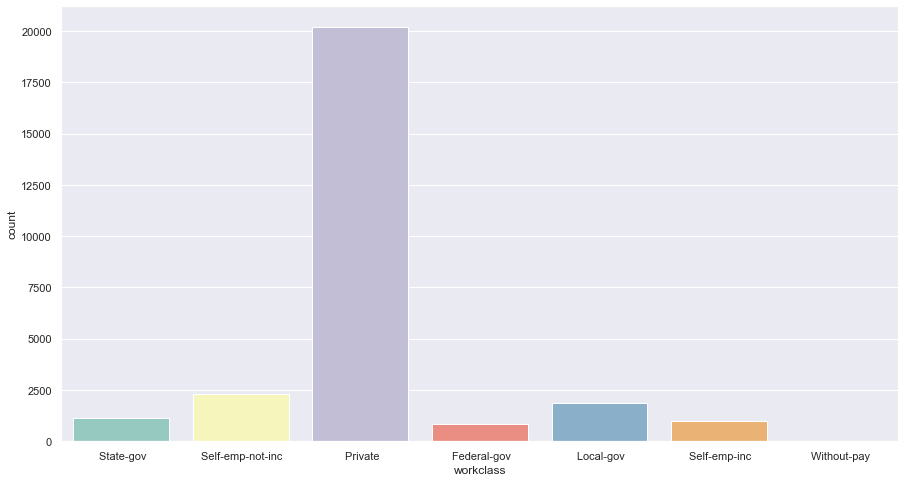

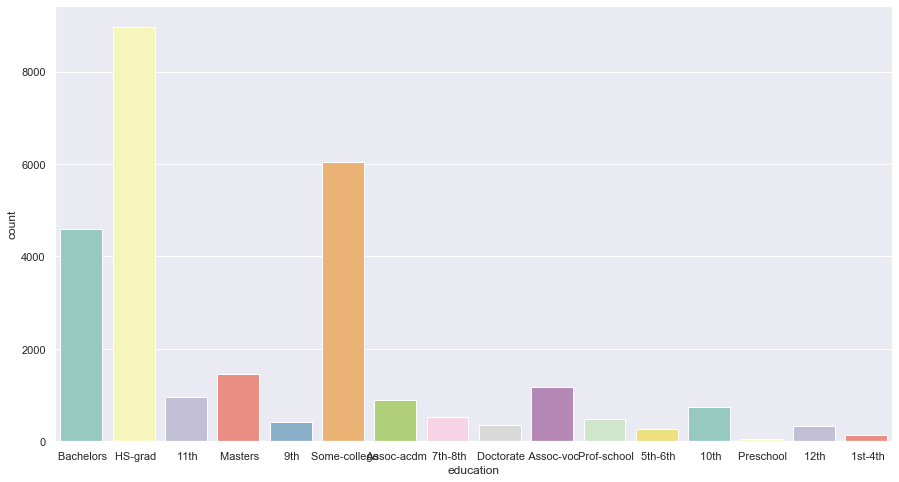

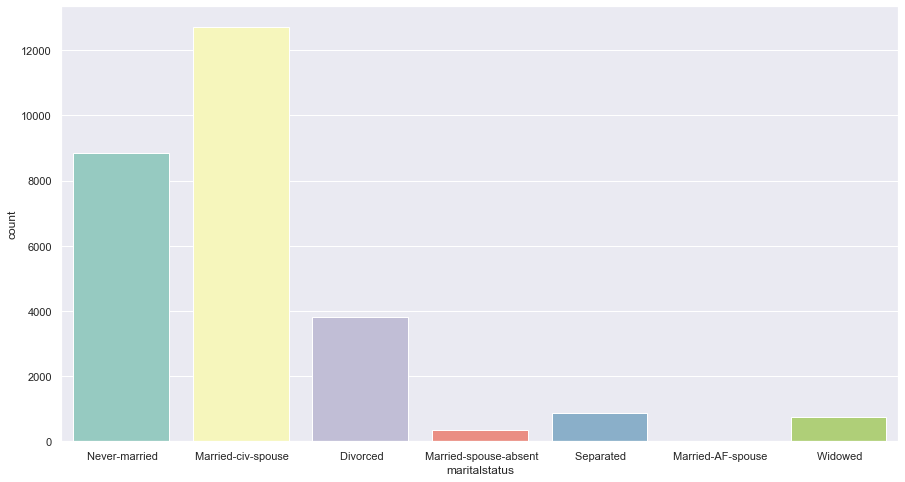

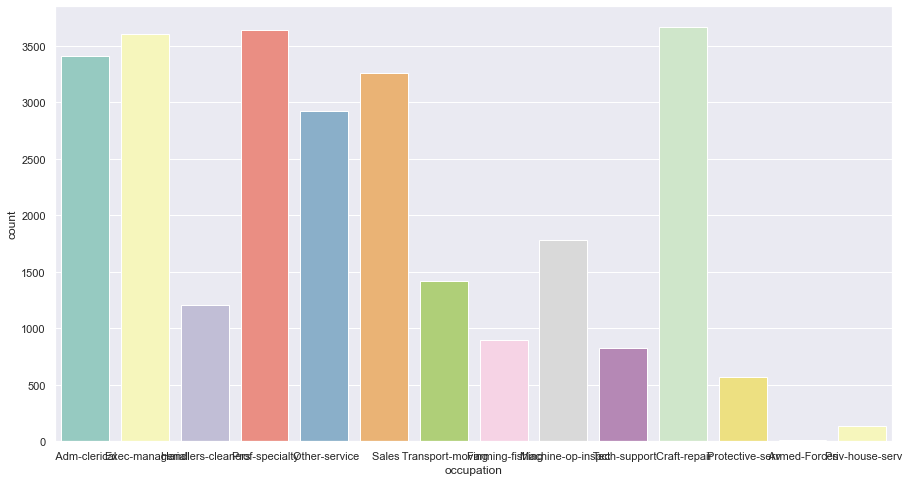

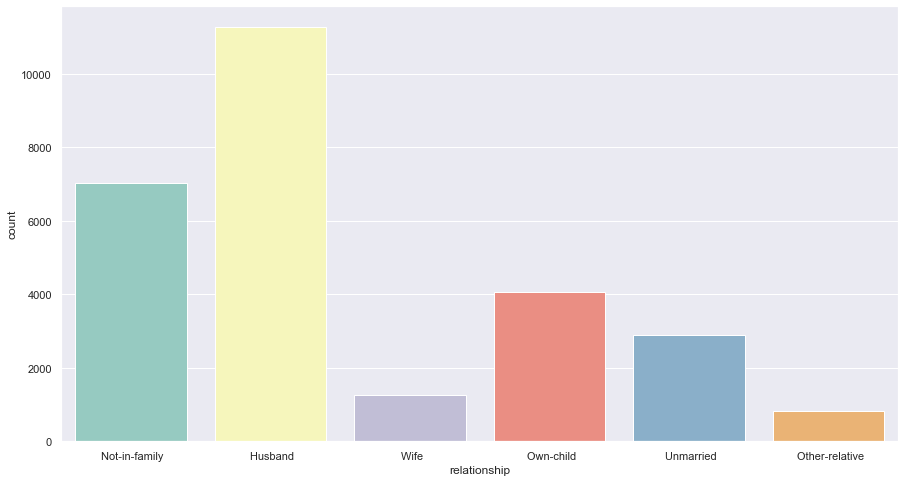

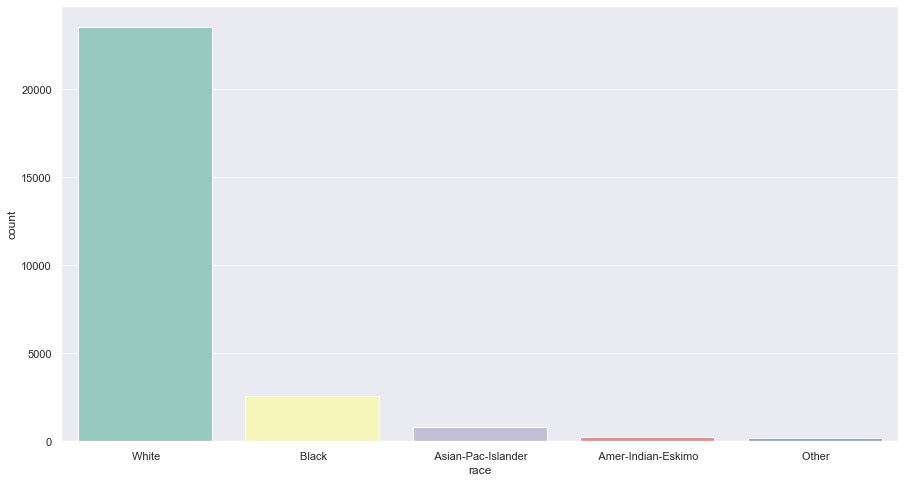

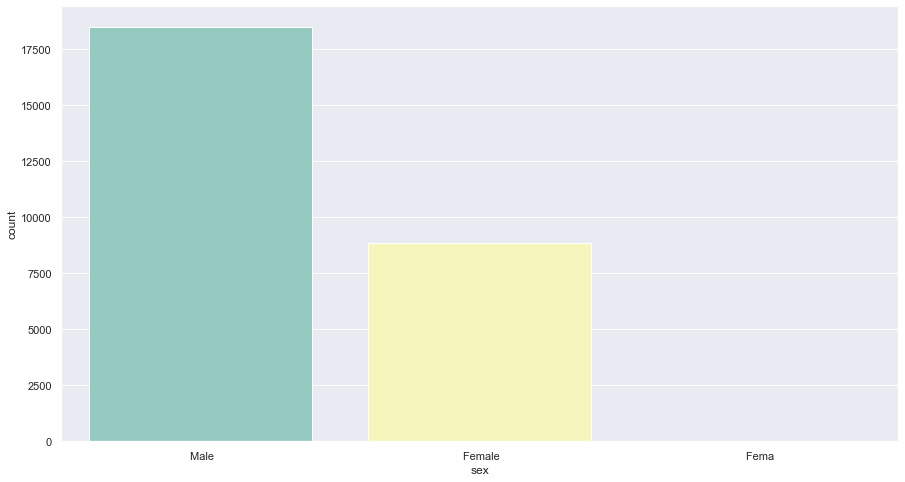

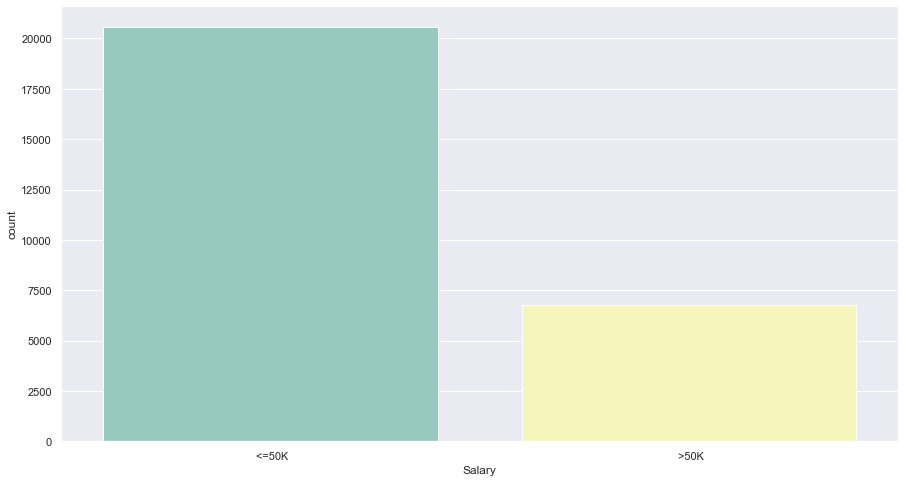

In [51]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3');

# Insights

- From the plot of workclass we can see that the count of people in private workclass is much high compared to others.
- From the plot of education we can see that the count of HS-grad is high compared to others followed by some-college and bachelors.
- From the plot of marital status we can see that the count of married-civ-spouse is high followed by never married and divorced.
- From the plot of occupation we can see count of Exec-managerial, Prof-speciality & Craft-repair are high and comparable within followed by adm-clerical and other-service etc.
- From the plot of relationship we can see that the count of husband is more than others.
- From the  plot of race we can see that most of the people are white. The count of other races is much low compared to white.
- From the plot of Sex we can see that the count of male is much high compared to other gender.
- From the plot of salary it is clear that the number of people earning salary less than 50k is much high than the people with salary more than 50k.

In [52]:
# printing unique values from each categoricla columns

print('workclass',train_data.workclass.unique())
print('education',train_data.education.unique())
print('maritalstatus',train_data['maritalstatus'].unique())
print('occupation',train_data.occupation.unique())
print('relationship',train_data.relationship.unique())
print('race',train_data.race.unique())
print('sex',train_data.sex.unique())
print('native',train_data['native'].unique())
print('Salary',train_data.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female' ' Fema']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' 

In [53]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.958247
0,<=50K,36.626660


<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 1440x360 with 0 Axes>

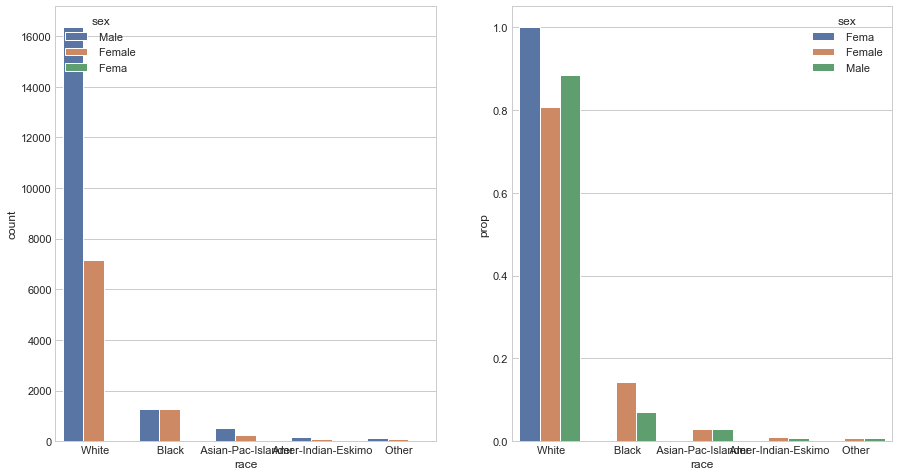

In [54]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

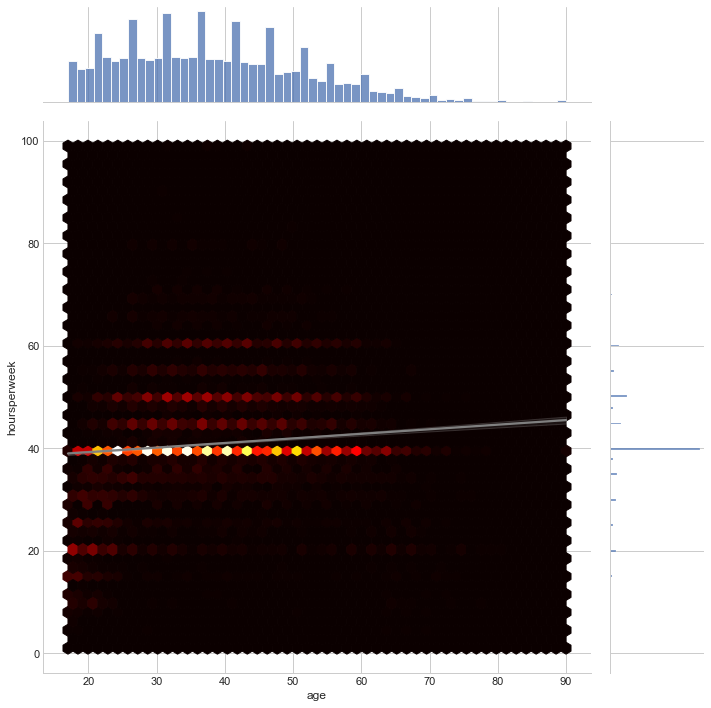

In [55]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = train_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(train_data.age, train_data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

In [56]:
#Feature encoding
from sklearn.preprocessing import LabelEncoder

train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,2,23,0,39,37,0
1,33,4,9,12,2,3,0,4,2,0,0,12,37,0
2,21,2,11,8,0,5,1,4,2,0,0,39,37,0
3,36,2,1,6,2,5,0,2,2,0,0,39,37,0
4,11,2,9,12,2,9,5,2,1,0,0,39,4,0


In [57]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [58]:
#Test-Train-Split
drop_elements = ['education', 'native', 'Salary']

X = train_data.drop(drop_elements, axis=1)

y = train_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
#Building SVM Model
from sklearn import metrics

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      6756
           1       0.87      0.26      0.41      2266
           2       0.00      0.00      0.00         1

    accuracy                           0.81      9023
   macro avg       0.56      0.42      0.43      9023
weighted avg       0.82      0.81      0.76      9023

[[6667   89    0]
 [1667  599    0]
 [   1    0    0]]
Accuracy: 0.8052754072924748
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Suraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Suraj\AppData\Local\Temp\ipykernel_13252\2086657726.py", line 13, in <cell line: 13>
    print("Precision:",metrics.precision_score(y_test, prediction))
  File "C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1365, in _check_set_wise_labels
    raise ValueError(
ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [N

In [60]:
#Testing it on new test data from SalaryData_Test(1).csv
drop_elements = ['education', 'native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

# make predictions
new_prediction = svc.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))
print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))


              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11360
           1       0.89      0.25      0.39      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.62      0.64     15060
weighted avg       0.82      0.81      0.76     15060

[[11241   119]
 [ 2780   920]]
Accuracy: 0.8075033200531209
Precision: 0.8854667949951877
Recall: 0.24864864864864866


In [61]:
#Building SVM model with Hyper Parameters kernel='rbf',gamma=15, C=1
model = SVC(kernel='rbf',gamma=15, C=1)

model.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      6756
           1       0.56      0.09      0.15      2266
           2       0.00      0.00      0.00         1

    accuracy                           0.75      9023
   macro avg       0.44      0.35      0.33      9023
weighted avg       0.71      0.75      0.68      9023

[[6601  155    0]
 [2071  195    0]
 [   1    0    0]]
Accuracy: 0.7531863016735011
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Suraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Suraj\AppData\Local\Temp\ipykernel_13252\4233246830.py", line 12, in <cell line: 12>
    print("Precision:",metrics.precision_score(y_test, prediction))
  File "C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1757, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
  File "C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1365, in _check_set_wise_labels
    raise ValueError(
ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [N

In [ ]:
#Testing above model on SalaryData_Test(1).csv
# make predictions
new_prediction = model.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))
print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

In [ ]:
#Building SVM model with Hyper Parameters kernel='linear',gamma=0.22, C=0.1
model_2 = SVC(kernel='linear',gamma=0.22, C=1)

model_2.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

In [ ]:
#Testing above model on SalaryData_Test(1).csv
# make predictions
new_prediction = model_2.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))
print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

In [ ]:
#Building SVM model with Hyper Parameters kernel='sigmoid',gamma=0.22, C=0.1
model_2 = SVC(kernel='sigmoid',gamma=0.22, C=1)

model_2.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

In [ ]:
#Testing above model on SalaryData_Test(1).csv
# make predictions
new_prediction = model_2.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))
print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

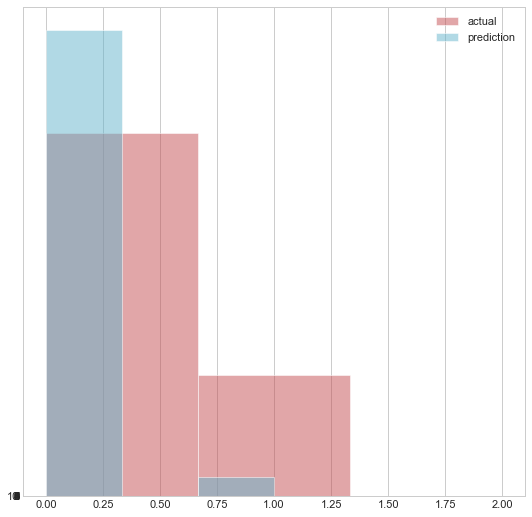

In [62]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'r', alpha = 0.5, label = 'actual', bins=3)
ax.hist(prediction, color = 'c', alpha = 0.5, label = 'prediction', bins=3)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# FOREST FIRES Dataset

In [63]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [65]:
# Loading Dataset
data = pd.read_csv(r"C:\Users\Suraj\Dropbox\My PC (DESKTOP-LAM9SRV)\Downloads\forestfires (2).csv")

In [66]:
#EDA & Data preprocessing
data.shape

(517, 31)

In [67]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [68]:
data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
287,jul,sat,91.6,104.2,474.9,9.0,22.1,49,2.7,0.0,...,0,0,1,0,0,0,0,0,0,small
460,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
246,aug,sun,91.8,175.1,700.7,13.8,25.7,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
109,sep,mon,88.6,91.8,709.9,7.1,17.4,56,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
451,aug,fri,90.5,196.8,649.9,16.3,11.8,88,4.9,0.0,...,0,0,0,0,0,0,0,0,0,large
181,oct,mon,84.9,32.8,664.2,3.0,19.1,32,4.0,0.0,...,0,0,0,0,0,0,0,1,0,small
329,sep,sat,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small
335,sep,mon,91.6,108.4,764.0,6.2,9.8,86,1.8,0.0,...,0,0,0,0,0,0,0,0,1,small
309,sep,sun,92.4,105.8,758.1,9.9,24.9,27,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
298,jun,wed,91.2,147.8,377.2,12.7,19.6,43,4.9,0.0,...,0,0,0,1,0,0,0,0,0,small


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [70]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [72]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [73]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

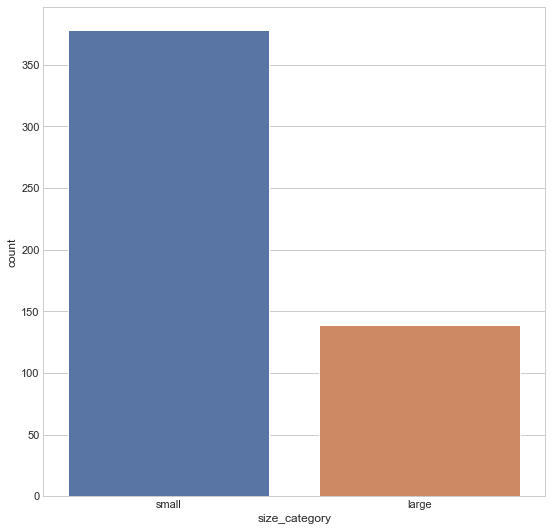

In [74]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [75]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category,large,small
area,,
0.00,0,247
0.09,0,1
0.17,0,1
0.21,0,1
0.24,0,1
...,...,...
200.94,1,0
212.88,1,0
278.53,1,0


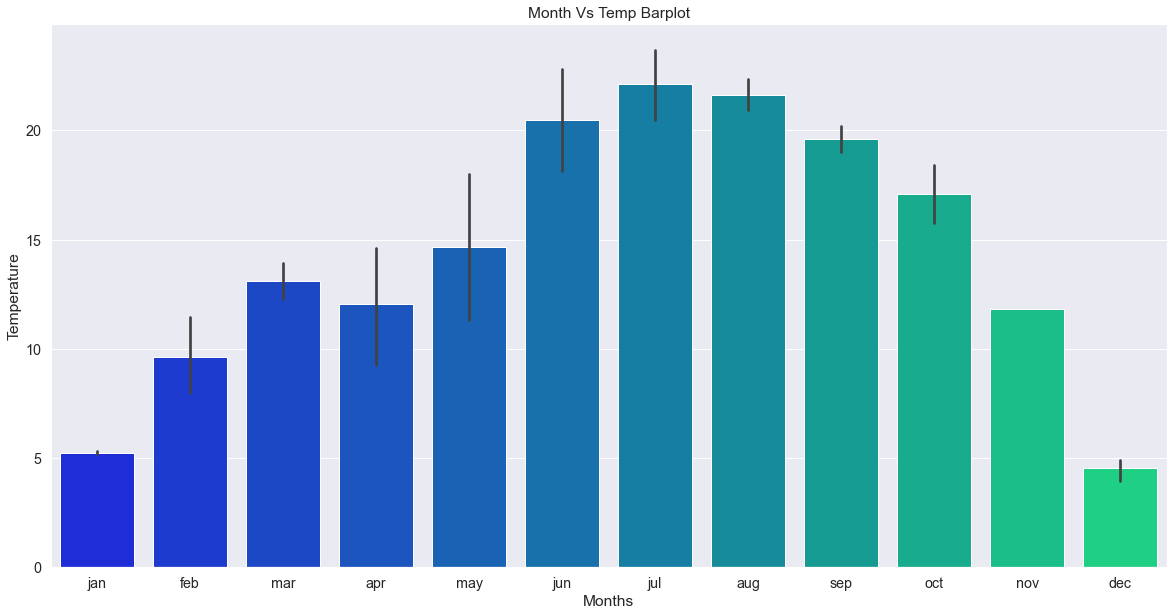

In [76]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

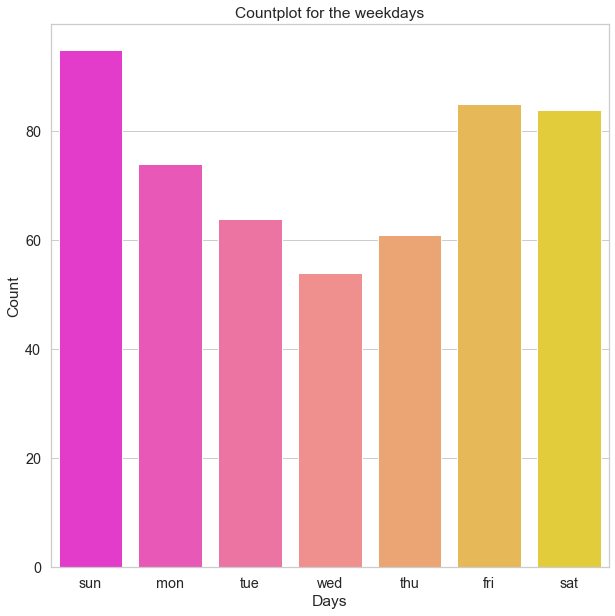

In [77]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

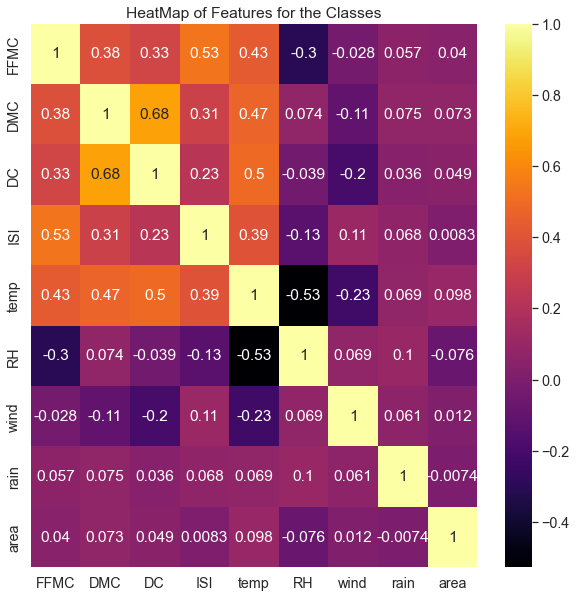

In [78]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [79]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [80]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


# Forestfires Dataset

In [81]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [82]:
data = pd.read_csv('F:\Assignment\Assignment 17/forestfires (1).csv')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Suraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Suraj\AppData\Local\Temp\ipykernel_13252\2807103526.py", line 1, in <cell line: 1>
    data = pd.read_csv('F:\Assignment\Assignment 17/forestfires (1).csv')
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\io\parsers\readers.py", line 680, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\io\parsers\readers.py", line 575, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\io\parsers\readers.py", line 933, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "C:\Users\Suraj\anaconda3\

In [83]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [84]:
#EDA & Data preprocessing
data.shape

(517, 12)

In [85]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [86]:
data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
93,8,7,91.4,142.4,601.4,10.6,18.2,43,4.9,0.0,0.00,small
445,8,7,94.0,47.9,100.7,10.7,17.3,80,4.5,0.0,0.00,small
80,8,7,91.4,142.4,601.4,10.6,19.5,39,6.3,0.0,0.00,small
303,6,5,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
49,3,1,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,0.00,small
70,3,5,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0,0.00,small
258,8,6,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00,small
164,9,7,89.7,90.0,704.4,4.8,17.8,67,2.2,0.0,2.01,small
358,9,5,92.5,122.0,789.7,10.2,19.7,39,2.7,0.0,0.00,small
154,9,6,93.4,145.4,721.4,8.1,29.6,27,2.7,0.0,1.46,small


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 48.6+ KB


In [88]:
data.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [89]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [90]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Suraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Suraj\AppData\Local\Temp\ipykernel_13252\3328362766.py", line 3, in <cell line: 3>
    data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec',
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\core\frame.py", line 4954, in drop
    return super().drop(
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\core\generic.py", line 4267, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "C:\Users\Suraj\anaconda3\lib\site-packages\pandas\core\generic.py", line 4311, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "C:\U

In [ ]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

In [ ]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [ ]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

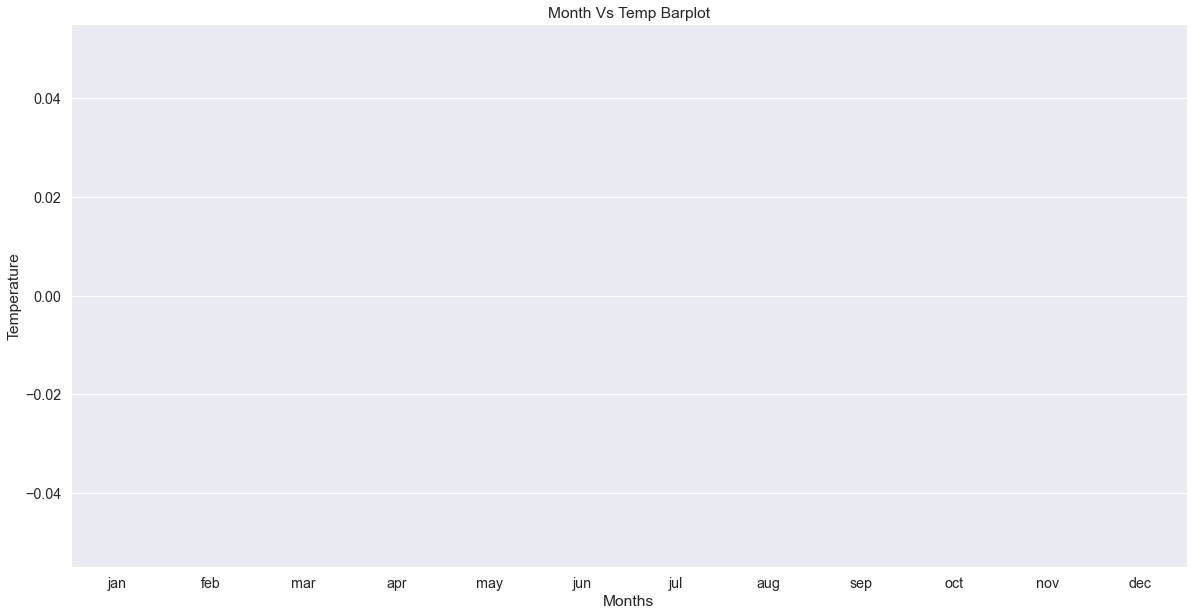

In [91]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

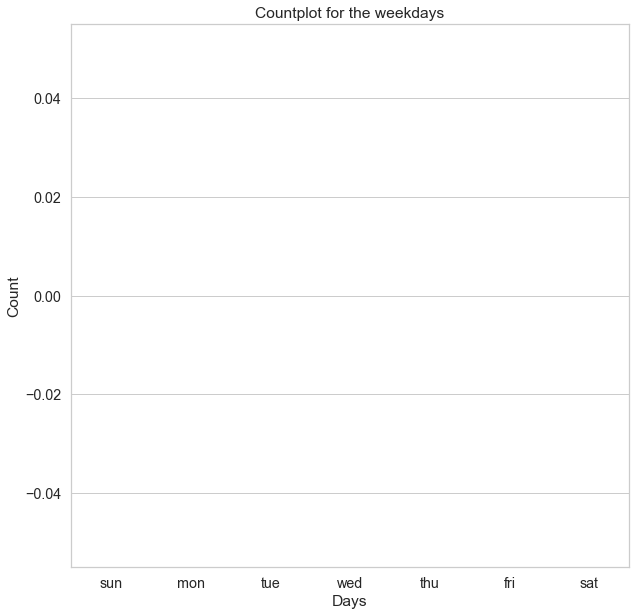

In [92]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

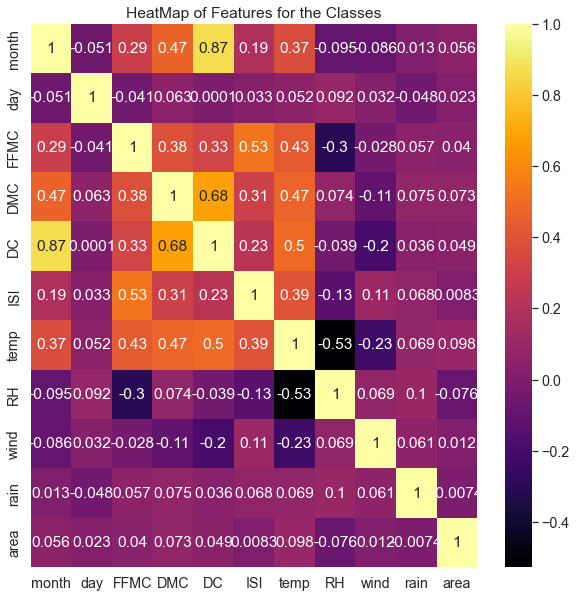

In [93]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [94]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [95]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [96]:
# Encoding target variable 'size category'

data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
350,9,5,92.1,99.0,745.3,9.6,10.1,75,3.6,0.0,3.71,0
397,8,7,91.6,181.3,613.0,7.6,24.3,33,3.6,0.0,3.63,0
163,9,6,92.5,121.1,674.4,8.6,17.8,56,1.8,0.0,1.95,0
180,9,7,92.4,124.1,680.7,8.5,23.9,32,6.7,0.0,5.33,0
407,2,6,84.7,8.2,55.0,2.9,14.2,46,4.0,0.0,0.00,0


In [97]:
data.corr()['size_category'].sort_values(ascending=False)

size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [98]:
# Standardizing data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [99]:
scaled_features=scaler.transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...
512,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,0.230531,1.323474,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,0.230531,0.840597,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [100]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


In [101]:
#Building SVM model
from sklearn import metrics

svc = SVC()
svc.fit(x_train, y_train)
# make predictions
prediction = svc.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       115
           1       0.90      0.22      0.35        41

    accuracy                           0.79       156
   macro avg       0.84      0.61      0.61       156
weighted avg       0.81      0.79      0.74       156

[[114   1]
 [ 32   9]]
Accuracy: 0.7884615384615384
Precision: 0.9
Recall: 0.21951219512195122


In [102]:
#Building SVM model with Hyper Parameters
model = SVC(kernel='rbf',gamma=15, C=1)

model.fit(x_train, y_train)
# make predictions
prediction = model.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       115
           1       0.75      0.07      0.13        41

    accuracy                           0.75       156
   macro avg       0.75      0.53      0.49       156
weighted avg       0.75      0.75      0.66       156

[[114   1]
 [ 38   3]]
Accuracy: 0.75
Precision: 0.75
Recall: 0.07317073170731707


In [103]:
#Building model with Grid Search CV
final_model = SVC(C= 15, gamma = 50, kernel = 'linear')

final_model.fit(x_train, y_train)
# make predictions
prediction = final_model.predict(x_test)
# summarize the fit of the final_model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.95      0.95      0.95        41

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156

[[113   2]
 [  2  39]]
Accuracy: 0.9743589743589743
Precision: 0.9512195121951219
Recall: 0.9512195121951219
